# Tutorial 1: Part 3

Objectives:
- Building a circular machine: introduce dipoles to the FODO cell.
- Use the matching MAD-X engine to compute the require magnet strength for a desired tune. 

**Adding dipoles in the FODO cell**

1. Consider now that the cell of Tutorial 1: Part 2 and add 4 sector dipoles of 15 m (asume 5 m of drift space between the magnets). Consider  ring with 736 dipoles with equal bending angles. Install the four dipoles in the FODO cell.

        Define the dipole parameters:
        BM: dipole, L=??, angle:=??;
    
        Add the dipole in the sequence: 
        dipole1: BM, at=??;


2. Do the dipoles (weak focusing) affect the $\beta_{max}$ and the dispersion? Compute the relative variation on the $\beta_{max}$ on the two planes.

3. From the phase advance of the FODO cell compute the horizontal and vertical tune of the machine?

**From the FODO phase advance to the machine tune**

4. change the beam to $E_{tot}= 3.5 TeV$. What is the new tune of the machine? Why?

5. Supose you want to set a tune (60.2, 67.2), use the MAD-X matching routine on a single FODO to get it. 
     
        MATCH, SEQUENCE=myCell;
        GLOBAL, Q1=phaseWantedX;//H-tune
        GLOBAL, Q2=phaseWantedY;//V-tune
        VARY, NAME= myKF, STEP=0.00001;
        VARY, NAME= myKD, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;

6. What is the maximum tune that you need to reach with such a lattice? (HINT: what is the maximum phase advance per FODO cell in the thin lense approximation...)

<div>
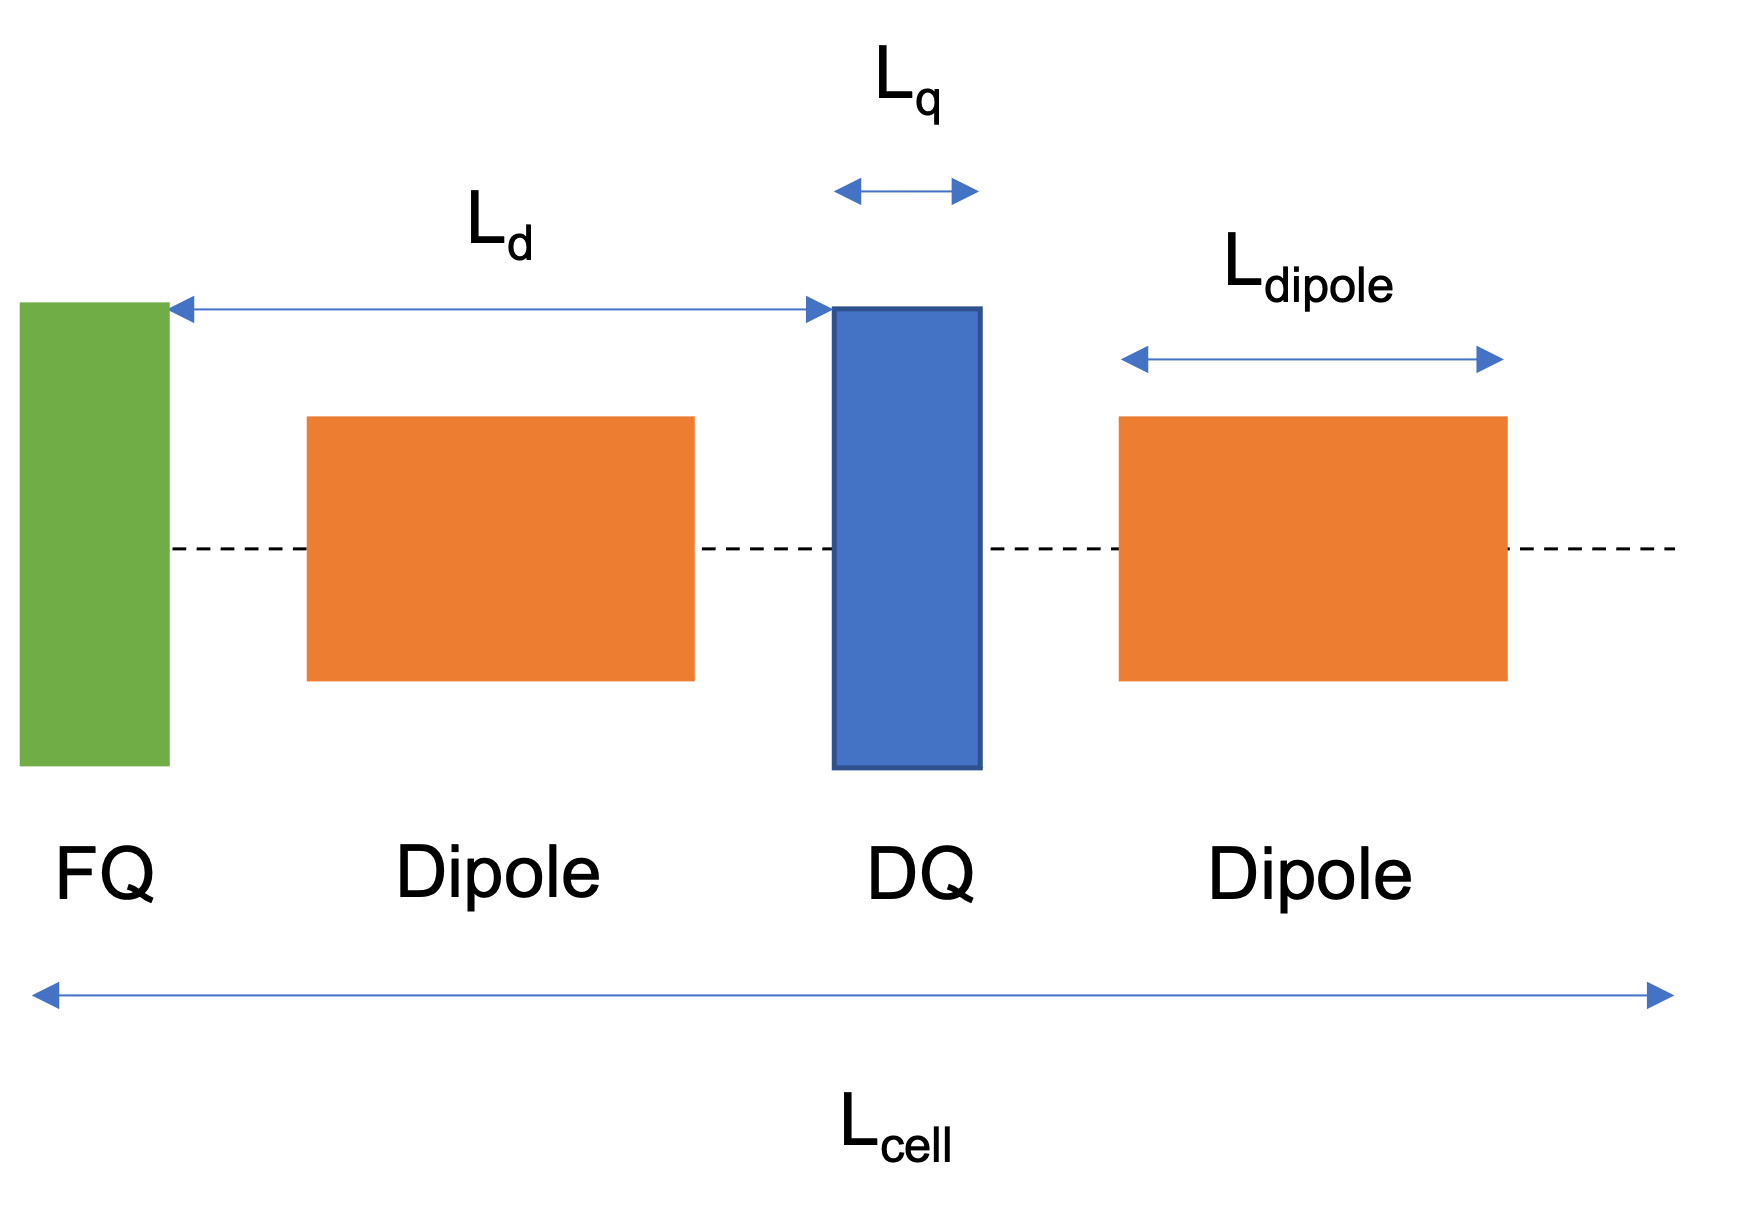
</div>

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
from cpymad.madx import Madx 

In [4]:
myMad = Madx(stdout=True)


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.11.30 13:39:04      +
  ++++++++++++++++++++++++++++++++++++++++++++


1. Consider now that the cell of Tutorial 1: Part 2 and add 4 sector dipoles of 15 m (asume 5 m of drift space between the magnets). Consider  ring with 736 dipoles with equal bending angles. Install the four dipoles in the FODO cell.

First, the calculation of the required bending angle for a circular orbit:

$2*\pi=N\theta$

In [112]:
myMad = Madx(stdout=True)
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;

myK=2.8/cellLength/quadrupoleLength;// m^-2
myAngle=2*pi/nBend;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

QF: quadrupole, L=quadrupoleLength, K1=myK;
QD: quadrupole, L=quadrupoleLength, K1=-myK;
BM: sbend, L=dipoleLength, angle:=myAngle; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************
beam, particle=proton, energy=7000;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
twiss, table=first_twiss, file=Tutorial1_Part3.txt;
plot, table=first_twiss, haxis=s, vaxis=betx,bety,dx,colour=100, file=Tutorial1_part3;
'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.03 18:23:28      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0006051853679        40.64955451 

                q1                dq1            betxmax              dxmax 
       0.236500685      -0.2917600666        160.5475138        2.444933737 

             dxrms             xcomax             xcorms                 q2 
       1.953527658                  0                  0       0.2363728498 

               dq2            betymax              dymax 

In [111]:
first_df=myMad.table['first_twiss'].dframe()
first_summary=myMad.table['summ'].dframe()

In [93]:
first_df[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,160.547514,-2.259046,0.000000,34.217492,0.548735,0.000000,2.444934,0.0,0.034634,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,160.547514,2.259046,0.004843,34.217492,-0.548735,0.023892,2.444934,0.0,-0.034634,0.0
drift_0[0],drift_0:0,drift,10.0,0.0,0.0,0.0,0.0,138.907441,2.068969,0.010172,40.655458,-0.738858,0.045293,2.271763,0.0,-0.034634,0.0
b1,b1:1,sbend,25.0,0.0,0.0,0.0,0.0,85.384548,1.499138,0.032163,71.376768,-1.309229,0.090204,1.816202,0.0,-0.026107,0.0
drift_1[0],drift_1:0,drift,30.0,0.0,0.0,0.0,0.0,71.343992,1.308974,0.042366,85.419675,-1.499352,0.100402,1.685667,0.0,-0.026107,0.0
b2,b2:1,sbend,45.0,0.0,0.0,0.0,0.0,40.628665,0.738665,0.087302,138.955807,-2.069723,0.122384,1.358032,0.0,-0.017577,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,34.193082,0.548451,0.108717,160.603655,-2.259847,0.127712,1.270145,0.0,-0.017577,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,34.193082,-0.548451,0.132626,160.603655,2.259847,0.132553,1.270145,0.0,0.017577,0.0
drift_3[0],drift_3:0,drift,60.0,0.0,0.0,0.0,0.0,40.628665,-0.738665,0.154041,138.955807,2.069723,0.137881,1.358032,0.0,0.017577,0.0
b3,b3:1,sbend,75.0,0.0,0.0,0.0,0.0,71.343992,-1.308974,0.198978,85.419675,1.499352,0.159863,1.685667,0.0,0.026107,0.0


2. Do the dipoles (weak focusing) affect the 𝛽𝑚𝑎𝑥 and the dispersion? Compute the relative variation on the 𝛽𝑚𝑎𝑥 on the two planes.

In [113]:
myString='''
myAngle=2*pi*0;
twiss, table=second_twiss;
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="Second plot";
'''
myMad.input(myString);

++++++ info: myangle redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.2921003657        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.2921003657        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 


In [114]:
second_df=myMad.table['second_twiss'].dframe()
second_summary=myMad.table['summ'].dframe()

In [115]:
second_df[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,160.603655,-2.259847,0.000000,34.217492,0.548735,0.000000,0.0,-0.0,-0.0,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,160.603655,2.259847,0.004841,34.217492,-0.548735,0.023892,0.0,0.0,0.0,0.0
drift_0[0],drift_0:0,drift,10.0,0.0,0.0,0.0,0.0,138.955807,2.069723,0.010169,40.655458,-0.738858,0.045293,0.0,0.0,0.0,0.0
b1,b1:1,sbend,25.0,0.0,0.0,0.0,0.0,85.419675,1.499352,0.032151,71.376768,-1.309229,0.090204,0.0,0.0,0.0,0.0
drift_1[0],drift_1:0,drift,30.0,0.0,0.0,0.0,0.0,71.376768,1.309229,0.042350,85.419675,-1.499352,0.100402,0.0,0.0,0.0,0.0
b2,b2:1,sbend,45.0,0.0,0.0,0.0,0.0,40.655458,0.738858,0.087260,138.955807,-2.069723,0.122384,0.0,0.0,0.0,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,34.217492,0.548735,0.108661,160.603655,-2.259847,0.127712,0.0,0.0,0.0,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,34.217492,-0.548735,0.132553,160.603655,2.259847,0.132553,0.0,0.0,0.0,0.0
drift_3[0],drift_3:0,drift,60.0,0.0,0.0,0.0,0.0,40.655458,-0.738858,0.153953,138.955807,2.069723,0.137881,0.0,0.0,0.0,0.0
b3,b3:1,sbend,75.0,0.0,0.0,0.0,0.0,71.376768,-1.309229,0.198864,85.419675,1.499352,0.159863,0.0,0.0,0.0,0.0


In [116]:
aux=pd.DataFrame({'With dipoles':first_df.max(),'Without dipoles':second_df.max()})
aux.loc[['betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
        ]]

,With dipoles,Without dipoles
betx,160.547514,160.603655
alfx,2.259046,2.259847
mux,0.236501,0.236373
bety,160.603655,160.603655
alfy,2.259847,2.259847
muy,0.236373,0.236373
dx,2.444934,0.0
dy,0.0,0.0
dpx,0.034634,0.0
dpy,0.0,0.0


3. From the phase advance of the FODO cell compute the horizontal and vertical tune of the machine?

In [117]:
# There are
Ncells=736/4 
Ncells
#FODO cells

184.0

In [99]:
#The machine tunes are therefore
display(Ncells*first_df['mux'].max())
display(Ncells*first_df['muy'].max())

43.516126037479175

43.49260436271754

4. change the beam to $E_{tot}= 3.5 TeV$. What is the new tune of the machine? Why?

In [118]:
myMad = Madx()
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

myK=2.8/cellLength/quadrupoleLength;// m^-2
myAngle=2*pi/nBend;

QF: quadrupole, L=quadrupoleLength, K1=myK;
QD: quadrupole, L=quadrupoleLength, K1=-myK;
BM: sbend, L=dipoleLength, angle:=myAngle; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=1;!here I am bit  extreme to see an effect on chromaticity

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS
! *********************************************************************
twiss;

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.03 18:23:41      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0006051853679        40.64955451 

                q1                dq1            betxmax              dxmax 
       0.236500685      -0.8434856175        160.5475138        7.068364316 

             dxrms             xcomax             xcorms                 q2 
       5.647697104                  0                  0       0.2363728498 

               dq2            betymax              dymax 

In [101]:
third_df=myMad.table['twiss'].dframe()
third_summary=myMad.table['summ'].dframe()

In [119]:
third_df[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

,name,keyword,s,x,y,px,py,betx,alfx,mux,bety,alfy,muy,dx,dy,dpx,dpy
#s,mycell$start:1,marker,0.0,0.0,0.0,0.0,0.0,160.547514,-2.259046,0.000000,34.217492,0.548735,0.000000,7.068364,0.0,0.100128,-0.0
q1,q1:1,quadrupole,5.0,0.0,0.0,0.0,0.0,160.547514,2.259046,0.004843,34.217492,-0.548735,0.023892,7.068364,0.0,-0.100128,0.0
drift_0[0],drift_0:0,drift,10.0,0.0,0.0,0.0,0.0,138.907441,2.068969,0.010172,40.655458,-0.738858,0.045293,6.567724,0.0,-0.100128,0.0
b1,b1:1,sbend,25.0,0.0,0.0,0.0,0.0,85.384548,1.499138,0.032163,71.376768,-1.309229,0.090204,5.250686,0.0,-0.075476,0.0
drift_1[0],drift_1:0,drift,30.0,0.0,0.0,0.0,0.0,71.343992,1.308974,0.042366,85.419675,-1.499352,0.100402,4.873306,0.0,-0.075476,0.0
b2,b2:1,sbend,45.0,0.0,0.0,0.0,0.0,40.628665,0.738665,0.087302,138.955807,-2.069723,0.122384,3.926104,0.0,-0.050817,0.0
drift_2[0],drift_2:0,drift,50.0,0.0,0.0,0.0,0.0,34.193082,0.548451,0.108717,160.603655,-2.259847,0.127712,3.672020,0.0,-0.050817,0.0
q2,q2:1,quadrupole,55.0,0.0,0.0,0.0,0.0,34.193082,-0.548451,0.132626,160.603655,2.259847,0.132553,3.672020,0.0,0.050817,0.0
drift_3[0],drift_3:0,drift,60.0,0.0,0.0,0.0,0.0,40.628665,-0.738665,0.154041,138.955807,2.069723,0.137881,3.926104,0.0,0.050817,0.0
b3,b3:1,sbend,75.0,0.0,0.0,0.0,0.0,71.343992,-1.308974,0.198978,85.419675,1.499352,0.159863,4.873306,0.0,0.075476,0.0


In [120]:
# Machine tunes at 7000 GeV
display(Ncells*first_df['mux'].max())
display(Ncells*first_df['muy'].max())

43.516126037479175

43.49260436271754

In [121]:
# Machine tunes at 1 GeV
display(Ncells*third_df['mux'].max())
display(Ncells*third_df['muy'].max())

43.51612603747915

43.49260436271754

**Conclusion**: since the K1 is normalized to the beam rigidity, the beam rigidity has not impact on the beta fuctions and on the phase advance (watch out the definition of the DQ1 and all the momentum derivative quantities in MADX...) the tunes are the same.

In [122]:
# Machine chromaticity at 7000 GeV
display(first_summary.iloc[0][['dq1','dq2']])

dq1   -0.291760
dq2   -0.291857
Name: #e, dtype: float64

In [123]:
# Machine chromaticity at 1 GeV
display(third_summary.iloc[0][['dq1','dq2']])

dq1   -0.843486
dq2   -0.843765
Name: #e, dtype: float64

In [124]:
# Whatch out the importance of beta for the chromaticity!
# compute the beta relativistic factor
import numpy as np
beta_r3=np.sqrt(1-(1/myMad.globals['pmass'])**(-2))
print("Relativistic factor beta for 1 GeV")
print(beta_r3)
beta_r1=np.sqrt(1-(7000/myMad.globals['pmass'])**(-2))
print("Relativistic factor beta for 7000 GeV")
print(beta_r1)
display(first_summary.iloc[0][['dq1','dq2']]*beta_r1)
display(third_summary.iloc[0][['dq1','dq2']]*beta_r3)

Relativistic factor beta for 1 GeV
0.34589808987601117
Relativistic factor beta for 7000 GeV
0.9999999910167907


dq1   -0.291760
dq2   -0.291857
Name: #e, dtype: float64

dq1   -0.291760
dq2   -0.291857
Name: #e, dtype: float64

# Tunes and phase

5. Supose you want to set a tune (60.2, 67.2), use the MAD-X matching routine on a single FODO to get it. 
     
        MATCH, SEQUENCE=myCell;
        GLOBAL, Q1=phaseWantedX;//H-tune
        GLOBAL, Q2=phaseWantedY;//V-tune
        VARY, NAME= myKF, STEP=0.00001;
        VARY, NAME= myKD, STEP=0.00001;
        LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
        ENDMATCH;



In [125]:
#Remeber that we have computed the total number of cells of the machine
Ncells=736/4 
print(Ncells)

184.0


In [126]:
#Phase advance per cell
np.array([60.2, 67.2])/Ncells

array([0.32717391, 0.36521739])

In [128]:
myMad = Madx(stdout=True)
myString='''

! *********************************************************************
! Definition of parameters
! *********************************************************************

quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;

! *********************************************************************
! Definition of magnets
! ********************************************************************* 

phaseWantedX=60.2/(nBend/4);
phaseWantedY=67.2/(nBend/4);


myKF=0.0056;
myKD=-0.0056;


QF: quadrupole, L=quadrupoleLength, K1:=myKF;
QD: quadrupole, L=quadrupoleLength, K1:=myKD;
BM: sbend, L=dipoleLength, angle=2*pi/nBend; 

! *********************************************************************
! Definition of sequence
! *********************************************************************

myCell:sequence, refer=entry, L=cellLength;
 q1: QF, at=0;
 B1: BM, at =5+quadrupoleLength/2, from=q1;
 B2: BM, at =5+dipoleLength/2, from=B1;
 q2: QD, at=cellLength/2;
 B3: BM, at =5+quadrupoleLength/2, from=q2;
 B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

! *********************************************************************
! Definition of beam
! *********************************************************************

beam, particle=proton, energy=7000;

! *********************************************************************
! Use of the sequence
! *********************************************************************
use, sequence=myCell;

! *********************************************************************
! TWISS BEFORE MATCHING
! *********************************************************************

twiss, table=beforematching, file="BeforeMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="BeforeMatching";

! *********************************************************************
! MATCHING
! *********************************************************************

MATCH, SEQUENCE=myCell;
GLOBAL, Q1=phaseWantedX;//H-tune
GLOBAL, Q2=phaseWantedY;//V-tune
VARY, NAME= myKF, STEP=0.00001;
VARY, NAME= myKD, STEP=0.00001;
LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
ENDMATCH;



! *********************************************************************
! TWISS AFTER MATCHING
! *********************************************************************

twiss, table=aftermatching, file="AfterMatching.txt";
plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching";

! *********************************************************************
! FINAL TUNE VALUES
! *********************************************************************

value, table(summ,Q1)*(nBend/4);
value, table(summ,Q2)*(nBend/4);

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.07.00  (64 bit, Darwin)      +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2021.05.03               +
  + Execution date: 2021.12.03 18:24:19      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0006051853679        40.64955451 

                q1                dq1            betxmax              dxmax 
       0.236500685      -0.2917600666        160.5475138        2.444933737 

             dxrms             xcomax             xcorms                 q2 
       1.953527658                  0                  0       0.2363728498 

               dq2            betymax              dymax 

If the maximum phase advance of a for FODO cell is 180 degrees in units of 2$\pi$ this is equal to 0.5 and the tune of the maxine will be:

In [129]:
Ncells*.5

92.0